# Problem statement

The goal of this project is to build a model that can predict the probability of heart disease occurrence, based on a combination of features that describes the disease. In order to achieve the goal, we used data sets that was collected by Cleveland Clinic Foundation in Switzerland. The dataset used in this project is part of a database contains 14 features from Cleveland Clinic Foundation for heart disease. The dataset shows different levels of heart disease presence from 1 to 4 and 0 for the absence of the disease. We have 303 rows of people data with 13 continuous observation of different symptoms.

# Dataset Information

The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.

**1.Age**: displays the age of the individual.

**2.Sex**: displays the gender of the individual using the following format :

1 = male
0 = female

**3.Chest-pain type**: displays the type of chest-pain experienced by the individual using the following format :

1 = typical angina
2 = atypical angina
3 = non — anginal pain
4 = asymptotic

**4.Resting Blood Pressure**: displays the resting blood pressure value of an individual in mmHg (unit)

**5.Serum Cholestrol**: displays the serum cholesterol in mg/dl (unit)

**6.Fasting Blood Sugar**: compares the fasting blood sugar value of an individual with 120mg/dl.

If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)

**7.Resting ECG**: displays resting electrocardiographic results

0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy

**8.Max heart rate achieved**: displays the max heart rate achieved by an individual.

**9.Exercise induced angina** :
1 = yes
0 = no

**10.ST depression induced by exercise relative to rest**: displays the value which is an integer or float.

**11.Peak exercise ST segment :**
1 = upsloping
2 = flat
3 = downsloping

**12.Number of major vessels (0–3) colored by flourosopy :** displays the value as integer or float.

**13.Thal :** displays the thalassemia :
3 = normal
6 = fixed defect
7 = reversible defect

**14.Diagnosis of heart disease** : Displays whether the individual is suffering from heart disease or not :

0 = absence
1, 2, 3, 4 = present.

# 1. Importing all libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn import svm

In [2]:
df=pd.read_csv('processed.cleveland.data')
df.head(10)

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


# 2. Adding the column header to the dataset.

In [3]:
df.columns=['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar',
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal','diagnosis']

In [4]:
df.head()

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


# 3. Getting some information on dataset.

In [5]:
df.shape

(302, 14)

In [6]:
df.isnull().sum()

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
vessels                 0
thal                    0
diagnosis               0
dtype: int64

In [7]:
df=df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   302 non-null    float64
 1   sex                   302 non-null    float64
 2   chest_pain            302 non-null    float64
 3   blood_pressure        302 non-null    float64
 4   serum_cholestoral     302 non-null    float64
 5   fasting_blood_sugar   302 non-null    float64
 6   electrocardiographic  302 non-null    float64
 7   max_heart_rate        302 non-null    float64
 8   induced_angina        302 non-null    float64
 9   ST_depression         302 non-null    float64
 10  slope                 302 non-null    float64
 11  vessels               302 non-null    object 
 12  thal                  302 non-null    object 
 13  diagnosis             302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 35.4+ KB


# 4. Getting the number of unique values for each 'Catgeorical' column to better understand the data's attributes.

In [9]:
df['diagnosis'].unique() # target attribute we'll predict through model

array([2, 1, 0, 3, 4], dtype=int64)

In [10]:
df['slope'].unique()

array([2., 3., 1.])

In [11]:
df['sex'].unique()

array([1., 0.])

In [12]:
df['chest_pain'].unique()

array([4., 3., 2., 1.])

In [13]:
df['induced_angina'].unique()

array([1., 0.])

In [14]:
df['thal'].unique() #here we have '?' unknown values 

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [15]:
df['vessels'].unique() #here we have '?' unknown values 

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [16]:
df['electrocardiographic'].unique()

array([2., 0., 1.])

In [17]:
df['fasting_blood_sugar'].unique()

array([0., 1.])

# 5. Getting the information for each 'Numerical' column to better understand the data's attributes.

In [18]:
df['age'].describe()

count    302.000000
mean      54.410596
std        9.040163
min       29.000000
25%       48.000000
50%       55.500000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [19]:
df['blood_pressure'].describe()

count    302.000000
mean     131.645695
std       17.612202
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: blood_pressure, dtype: float64

In [20]:
df['serum_cholestoral'].describe()

count    302.000000
mean     246.738411
std       51.856829
min      126.000000
25%      211.000000
50%      241.500000
75%      275.000000
max      564.000000
Name: serum_cholestoral, dtype: float64

In [21]:
df['max_heart_rate'].describe()

count    302.000000
mean     149.605960
std       22.912959
min       71.000000
25%      133.250000
50%      153.000000
75%      166.000000
max      202.000000
Name: max_heart_rate, dtype: float64

In [22]:
df['ST_depression'].describe()

count    302.000000
mean       1.035430
std        1.160723
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: ST_depression, dtype: float64

# 6. Inorder to deal with unknown value '?' for 'vessels' and 'thal' attributes, let's visualise the attributes first.

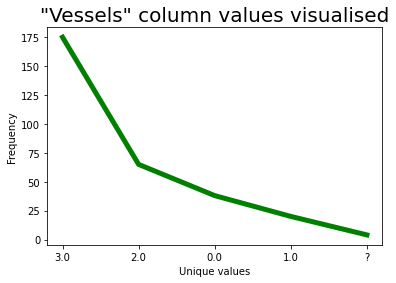

In [23]:
x=df['vessels'].unique()
y=df['vessels'].value_counts()
plt.title('"Vessels" column values visualised',color='black',size=20)
plt.xlabel("Unique values") 
plt.ylabel('Frequency') 
plt.plot(x,y,color='green',linewidth=5)
plt.show()

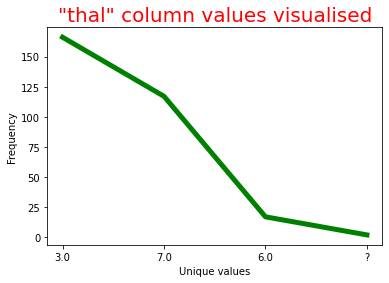

In [24]:
x=df['thal'].unique()
y=df['thal'].value_counts()

plt.title('"thal" column values visualised',color='red',size=20)
plt.xlabel('Unique values') 
plt.ylabel('Frequency') 
plt.plot(x,y,color='green',linewidth=5)
plt.show()

From the above visualisation, we can observe that the count of '?' values is very low.

# 7. Substituting the "?" value in both the 'categorical' variables with the mode of that attributes.

In [25]:
for c in df.columns[:-1]:
    df[c] = df[c].apply(lambda x: df[df[c]!='?'][c].astype(float).mode() if x == "?" else x)
    df[c] = df[c].astype(float)

In [26]:
df['thal'].unique()  #no more '?' unknown values now.

array([3., 7., 6.])

# 8. Visualsing the attributes after performing imputation.

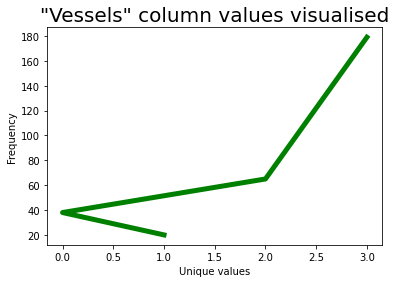

In [27]:
x=df['vessels'].unique()
y=df['vessels'].value_counts()

plt.title('"Vessels" column values visualised',color='black',size=20)
plt.xlabel('Unique values') 
plt.ylabel('Frequency') 
plt.plot(x,y,color='green',linewidth=5)
plt.show()

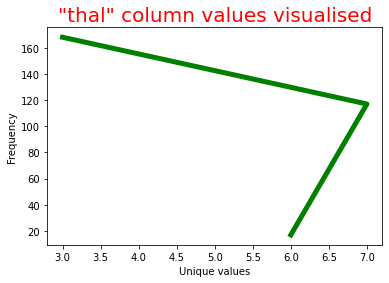

In [28]:
x=df['thal'].unique()
y=df['thal'].value_counts()

plt.title('"thal" column values visualised',color='red',size=20)
plt.xlabel('Unique values') 
plt.ylabel('Frequency') 
plt.plot(x,y,color='green',linewidth=5)
plt.show()

From these visualisations , we can therefore observe the absence of '?' values as they have been imputed during the preparation
phase of the dataset.

In [29]:
df.head(10)

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


# 9. Converting the target attribute into two major categories, i.e. 1 "means having diesease" and 0 means "not having diesase"

In [30]:
df.replace({'diagnosis':2},1,inplace= True)
df.replace({'diagnosis':3},1,inplace= True)
df.replace({'diagnosis':4},1,inplace= True)

In [31]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

In [32]:
df['diagnosis'].value_counts()

0    163
1    139
Name: diagnosis, dtype: int64

# 10. Making a copy of dataset and performing EDA on 'Categorical' variables by converting them into more readable form as per dataset description.

In [33]:
df_new=df.copy()

In [34]:
df_new.head()

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [35]:
df_new.replace({'sex':1},'Male',inplace=True)
df_new.replace({'sex':0}, 'Female',inplace= True)
df_new.replace({'diagnosis':0},'NO disease',inplace=True)
df_new.replace({'diagnosis':1},'Has disease',inplace=True)
df_new.replace({'chest_pain':1},'typical angina',inplace=True)
df_new.replace({'chest_pain':2},'atypical angina',inplace=True)
df_new.replace({'chest_pain':3},'non-anginal pain',inplace=True)
df_new.replace({'chest_pain':4},'asymptotic',inplace=True)
df_new.replace({'fasting_blood_sugar':0},'< 120 mg/dl',inplace=True)
df_new.replace({'fasting_blood_sugar':1},'>120 mg/dl',inplace=True)
df_new.replace({'electrocardiographic':0},'Normal',inplace=True)
df_new.replace({'electrocardiographic':1},'ST-T wave abnormality ',inplace=True)
df_new.replace({'electrocardiographic':2},'left ventricular hypertrophy',inplace=True)
df_new.replace({'induced_angina':1},'Yes',inplace=True)
df_new.replace({'induced_angina':0},'No',inplace=True)

In [36]:
df_new.shape

(302, 14)

In [37]:
df_new.head(10)

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,67.0,Male,asymptotic,160.0,286.0,< 120 mg/dl,left ventricular hypertrophy,108.0,Yes,1.5,2.0,3.0,3.0,Has disease
1,67.0,Male,asymptotic,120.0,229.0,< 120 mg/dl,left ventricular hypertrophy,129.0,Yes,2.6,2.0,2.0,7.0,Has disease
2,37.0,Male,non-anginal pain,130.0,250.0,< 120 mg/dl,Normal,187.0,No,3.5,3.0,0.0,3.0,NO disease
3,41.0,Female,atypical angina,130.0,204.0,< 120 mg/dl,left ventricular hypertrophy,172.0,No,1.4,1.0,0.0,3.0,NO disease
4,56.0,Male,atypical angina,120.0,236.0,< 120 mg/dl,Normal,178.0,No,0.8,1.0,0.0,3.0,NO disease
5,62.0,Female,asymptotic,140.0,268.0,< 120 mg/dl,left ventricular hypertrophy,160.0,No,3.6,3.0,2.0,3.0,Has disease
6,57.0,Female,asymptotic,120.0,354.0,< 120 mg/dl,Normal,163.0,Yes,0.6,1.0,0.0,3.0,NO disease
7,63.0,Male,asymptotic,130.0,254.0,< 120 mg/dl,left ventricular hypertrophy,147.0,No,1.4,2.0,1.0,7.0,Has disease
8,53.0,Male,asymptotic,140.0,203.0,>120 mg/dl,left ventricular hypertrophy,155.0,Yes,3.1,3.0,0.0,7.0,Has disease
9,57.0,Male,asymptotic,140.0,192.0,< 120 mg/dl,Normal,148.0,No,0.4,2.0,0.0,6.0,NO disease


# 11.Exploratory Data Analysis started from here.

In [91]:
print(" 11.1 Minimum & Maximum blood pressure of people having disease and not having diesease.")
df_new.groupby(['diagnosis'])['blood_pressure'].min().astype(str) + ' , '+ df_new.groupby(['diagnosis'])['blood_pressure'].max().astype(str)

 11.1 Minimum & Maximum blood pressure of people having disease and not having diesease.


diagnosis
Has disease    100.0 , 200.0
NO disease      94.0 , 180.0
Name: blood_pressure, dtype: object

In [39]:
#let's see how fasting_blood_sugar is related to no. of people under diagnosis
print("No. of people having high fasting blood sugar levels and resulting in disease")
df_new.groupby(['fasting_blood_sugar','diagnosis'])['age'].count()

No. of people having high fasting blood sugar levels and resulting in disease


fasting_blood_sugar  diagnosis  
< 120 mg/dl          Has disease    117
                     NO disease     141
>120 mg/dl           Has disease     22
                     NO disease      22
Name: age, dtype: int64

In [40]:
print("Mean age of people having disease and not having diesease")
df_new.groupby(["diagnosis", ])["age"].mean()

Mean age of people having disease and not having diesease


diagnosis
Has disease    56.625899
NO disease     52.521472
Name: age, dtype: float64

In [41]:
print("No. of people of particular sex having disease and not having diesease")
df_new.groupby(['diagnosis','sex'])['age'].count().transpose()

No. of people of particular sex having disease and not having diesease


diagnosis    sex   
Has disease  Female     25
             Male      114
NO disease   Female     72
             Male       91
Name: age, dtype: int64

In [42]:
print("No. of people having chest pain complaints and resulting in diesease")
df_new.groupby(['chest_pain','diagnosis'])['age'].count().transpose()

No. of people having chest pain complaints and resulting in diesease


chest_pain        diagnosis  
asymptotic        Has disease    105
                  NO disease      39
atypical angina   Has disease      9
                  NO disease      41
non-anginal pain  Has disease     18
                  NO disease      68
typical angina    Has disease      7
                  NO disease      15
Name: age, dtype: int64

# 12. Exploratory Data Analysis with Visualisations.

**12.1 Relationship between Age and Blood pressure**

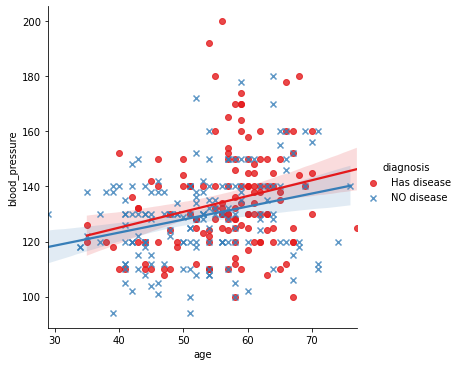

In [43]:
sb.lmplot(x="age", y="blood_pressure", hue="diagnosis", data=df_new, palette="Set1", markers=["o", "x"])

**12.2 Relationship between Age and Sex**

Text(0.5, 1.0, 'Relationship between Age and Sex with Diagnosis.')

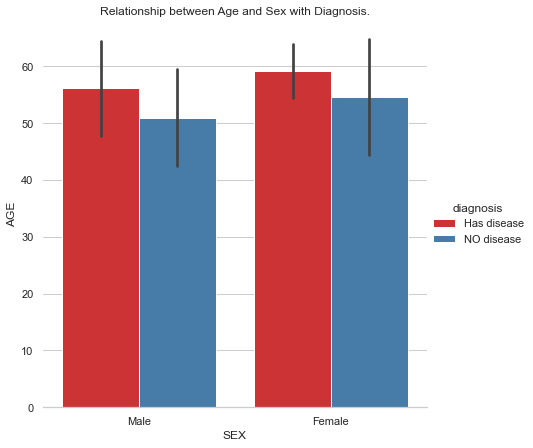

In [44]:
sb.set_theme(style="whitegrid")
g=sb.catplot(data=df_new, kind="bar",x='sex', y="age", hue="diagnosis",ci="sd", palette="Set1", height=6
)
g.despine(left=True)
g.set_axis_labels("SEX", "AGE")
plt.title('Relationship between Age and Sex with Diagnosis.')

**12.3 No.of people of particular sex having disease or not.**

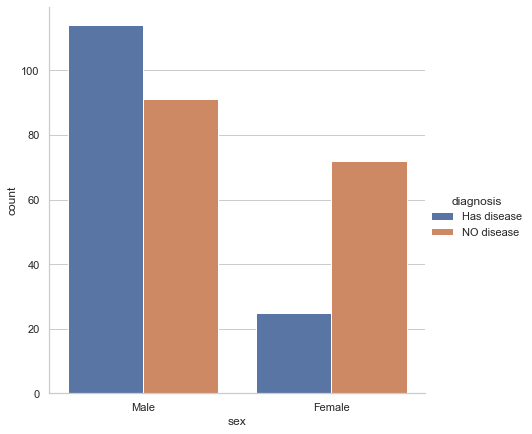

In [45]:
sb.catplot(x="sex", hue="diagnosis",data=df_new, kind="count",height=6, aspect=1);

**12.4 No.of people having chest pain complaints and resulting in diesease.**

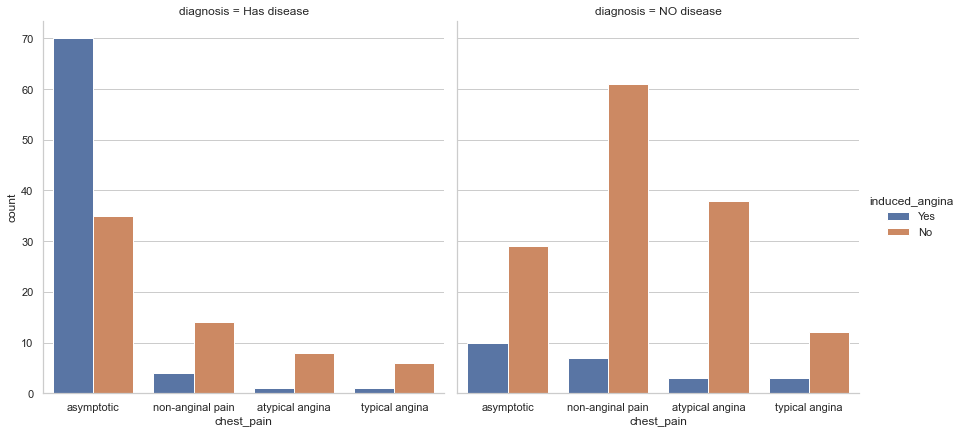

In [46]:
sb.catplot(x="chest_pain", hue="induced_angina", col="diagnosis",data=df_new, kind="count",height=6, aspect=1);

**12.5 Count of people with respect to fasting blood sugar relating to diagnosis.**

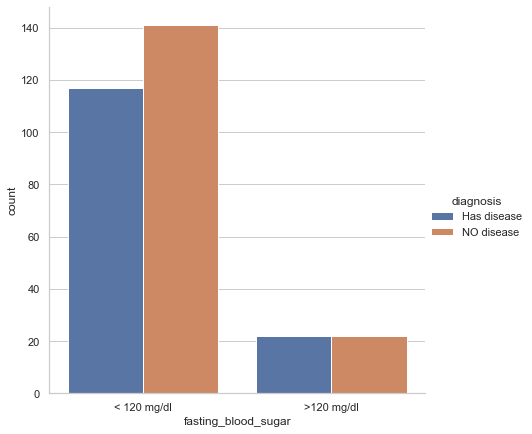

In [47]:
sb.catplot(x="fasting_blood_sugar", hue="diagnosis",data=df_new, kind="count",height=6, aspect=1);

**12.6 Relationship between Age & Serum cholestoral.**

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between Age & Serum Cholestrol')

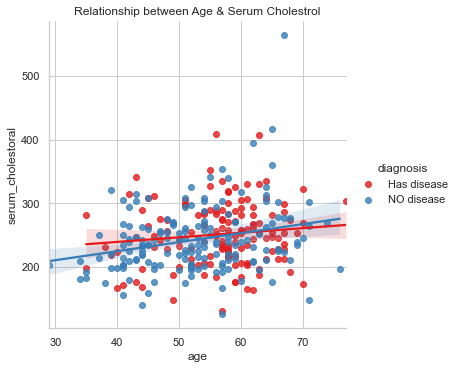

In [48]:
sb.pairplot(df_new, x_vars=['age'], y_vars='serum_cholestoral', hue='diagnosis',size=5, aspect=1, kind='reg',palette='Set1')
plt.title("Relationship between Age & Serum Cholestrol")

Text(0.5, 1.0, 'Relationship between Thal & Diagnosis')

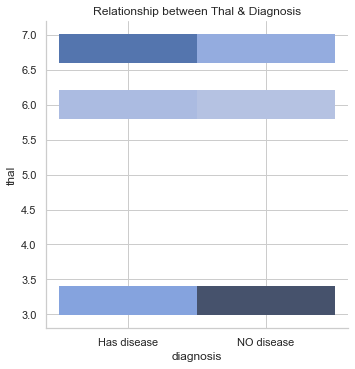

In [49]:
sb.pairplot(df_new, x_vars=['diagnosis'], y_vars='thal', height=5, aspect=1, kind='hist')
plt.title("Relationship between Thal & Diagnosis")

**12.7 Relationship between thal and slope.**

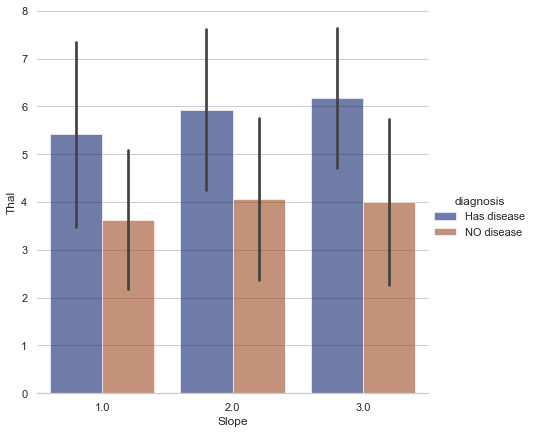

In [50]:
sb.set_theme(style="whitegrid")
g = sb.catplot(data=df_new, kind="bar",x='slope', y="thal", hue="diagnosis",ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("Slope", "Thal")

**12.8 Relationship between age & thal.**

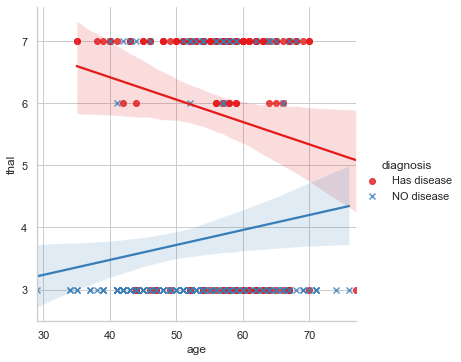

In [51]:
sb.lmplot(x="age", y="thal", hue="diagnosis", data=df_new,palette="Set1", markers=["o", "x"])

**12.9 Visulasing the " count of vessels type " with respect to " diagnosis ".**

<AxesSubplot:xlabel='vessels', ylabel='count'>

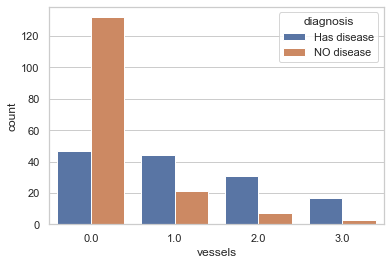

In [52]:
sb.countplot(x="vessels", hue="diagnosis", data=df_new)

**12.10 Relationship between " Age " & " Max heart rate ".**

Text(0.5, 1.0, 'Relationship between Age & Max heart rate')

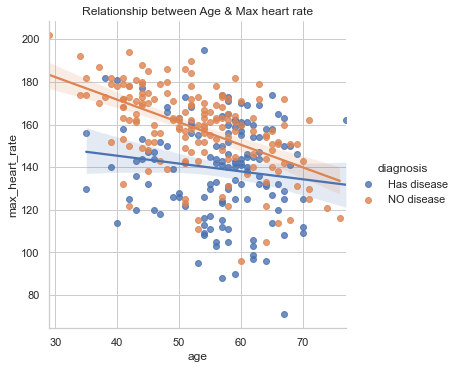

In [53]:
sb.pairplot(df_new, x_vars=['age'], y_vars='max_heart_rate', hue='diagnosis',height=5, aspect=1, kind='reg')
plt.title("Relationship between Age & Max heart rate")

**12.11 Relationship between " Age " & " ST depression ".**

Text(0.5, 1.0, 'Relationship between Age & ST_depression')

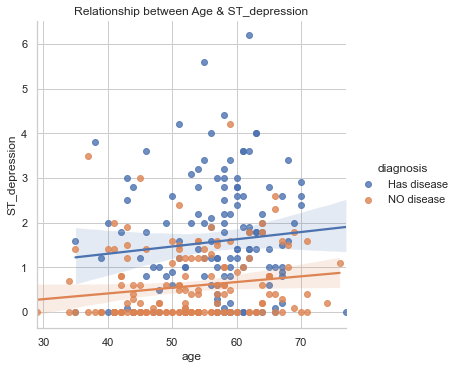

In [54]:
sb.pairplot(df_new, x_vars=['age'], y_vars='ST_depression',hue='diagnosis', height=5, aspect=1, kind='reg')
plt.title("Relationship between Age & ST_depression")

**12.12 Building a "Heatmap"  for finding the corelations.**

Text(0.5, 1.0, 'Correlation between features')

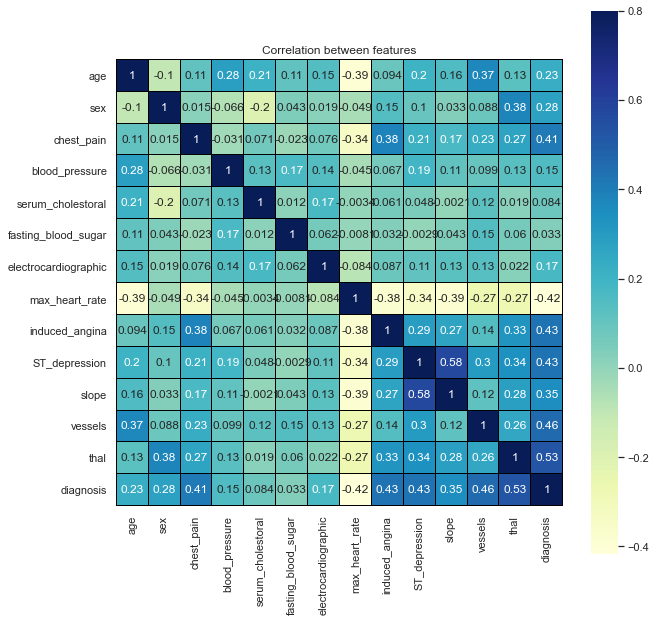

In [56]:
corr = df.corr()
plt.figure(figsize=(10,10))
sb.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

# 13. Pre-processing the independent attributes of the dataset.

In [57]:
from sklearn.preprocessing import StandardScaler
std_scalar=StandardScaler()
X=std_scalar.fit_transform(df.loc[:,df.columns != 'diagnosis'])

In [58]:
X.shape

(302, 13)

In [59]:
y=df.diagnosis

In [60]:
y.shape

(302,)

# 14 Model Training

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [62]:
lr=LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [63]:
y_pred_test = lr.predict(X_test)

# 15. Model Evaluation

**15.1 Accuracy score**

In [64]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.8032786885245902


**15.2 Confusion Matrix**

In [65]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0   1
0  27   7
1   5  22


In [66]:
confusion_matrix.index = ['Actual disease','Actual no disease']
confusion_matrix.columns = ['Predicted disease','Predicted no disease']
print(confusion_matrix)

                   Predicted disease  Predicted no disease
Actual disease                    27                     7
Actual no disease                  5                    22


This means we have 27+22= 49 **correct predcitions** & 7+5=12 **incorrect predictions**.

 **15.3 Precision score**

In [67]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,y_pred_test)
print('Precision score for test data using model1 is:', precision1)

Precision score for test data using model1 is: 0.7586206896551724


**15.4 Recall score**

In [68]:
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,y_pred_test)) 

Recall score for test data using model1 is: 0.8148148148148148


**15.5 F1_score**

In [69]:
from sklearn.metrics import f1_score
print('F1_score for test data using model1 is:',f1_score(y_test, y_pred_test))

F1_score for test data using model1 is: 0.7857142857142857


**15.6 ROC_AUC curve**

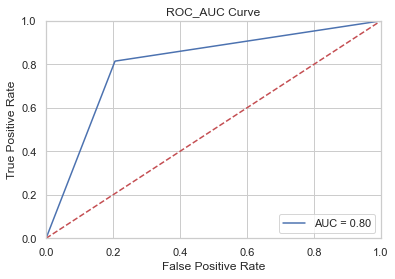

In [71]:
from sklearn import metrics
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC_AUC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model Tuning 

In section 14
we have used, **.predict method** for classification. 
This method takes 0.5 as the default threshold for prediction.
Now, we are going to see the impact of changing threshold on the accuracy of our logistic regression model.
For this we are going to use **.predict_proba method** instead of using .predict method.

Setting the threshold to **0.75**

**15.7 New Accuracy score**

In [72]:
preds2 = np.where(lr.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.819672131147541


**15.8 New Precision score**

In [73]:
from sklearn.metrics import precision_score
precision2 = precision_score(y_test,preds2)
print('Precision score for test datais:', precision2)

Precision score for test datais: 0.8636363636363636


**15.9 New Recall score**

In [74]:
from sklearn.metrics import recall_score
print('Recall score for test data is:',recall_score(y_test,preds2)) 

Recall score for test data is: 0.7037037037037037


**15.10 New F1 Score**

In [75]:
from sklearn.metrics import f1_score
print('F1_score for test data using is:',f1_score(y_test, preds2))

F1_score for test data using is: 0.7755102040816326


**15.11 New ROC_AUC curve**

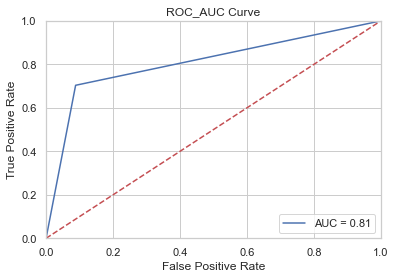

In [76]:
from sklearn import metrics
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds2)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC_AUC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**15.12 New confusion matrix**

In [77]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, preds2))
confusion_matrix.index = ['Actual disease','Actual no disease']
confusion_matrix.columns = ['Predicted disease','Predicted no disease']
print(confusion_matrix)

                   Predicted disease  Predicted no disease
Actual disease                    31                     3
Actual no disease                  8                    19


This means we have 31+19= 50 **correct predcitions** & 8+3=11 **incorrect predictions**.

Therefore, after tuning the parameters of **LogisticRegression algorithm**, we were able to increase the **accuracy score** and reduce the no. of **incorrect predcitions**.
Now, let's check this dataset on different algorithm if we can get better results.

# 16. Using 'RandomForest' Classifier on this dataset.

Here we are following two approaches.

**1. Training a simple RandomForest classfier.**

**2. Training a RandomForest classifier with some parameters defined.**

In [78]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

**2. Model with parameter specified.**

In [79]:
model1 = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=0)

**16.1 Making predictions on both the models.**

In [80]:
y_pred_test = model.predict(X_test)              # make predictions on the testing set
y_pred_test1 = model1.predict(X_test)

# 16.2 . Model Evaluation


**Error** is the deviation of the values predicted by the model with the true values.

We will use **accuracy score** and **confusion matrix** for evaluation.

**16.2.1 Model Evaluation using accuracy_score**

In [81]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data using the model without parameter specification: 0.7704918032786885
Accuracy score for test data using the model with parameter specification: 0.7868852459016393


**16.2.2 Model Evaluation using Confusion matrix.**

In [82]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual disease','Actual no disease']
confusion_matrix.columns = ['Predicted disease','Predicted no disease']
print(confusion_matrix)

                   Predicted disease  Predicted no disease
Actual disease                    27                     7
Actual no disease                  7                    20


This means we have 27+20= 47 **correct predcitions** & 7+7=14 **incorrect predictions** when we use **RandomForest classifier without 
any parameters specified.**

In [83]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual disease','Actual no disease']
confusion_matrix.columns = ['Predicted disease','Predicted no disease']
print(confusion_matrix)

                   Predicted disease  Predicted no disease
Actual disease                    27                     7
Actual no disease                  6                    21


This means we have 27+21= 48 **correct predcitions** & 6+7=13 **incorrect predictions** when we use **RandomForest classifier with parameters specified.**

# 16.3 Tuning the RandomForest classifier with RandomizedsearchCV.¶

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [85]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 5),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027EFFB160A0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027EA92AC760>,
                                        'n_estimators': [100, 400, 700, 1000,
                                                         1500]})

**16.3.1 Using the model for prediction.**

In [86]:
y_pred_test1 = random_search.predict(X_test)

**16.3.2 Model Evaluation using accuracy_score.**

In [87]:
from sklearn.metrics import accuracy_score
print('Accuracy score on test data with RandomizedSearchCV is:', accuracy_score(y_test,y_pred_test1))

Accuracy score on test data with RandomizedSearchCV is: 0.819672131147541


**16.3.3 Model Evaluation using confusion matrix.**

In [88]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual disease','Actual no disease']
confusion_matrix.columns = ['Predicted disease','Predicted no disease']
print(confusion_matrix)

                   Predicted disease  Predicted no disease
Actual disease                    29                     5
Actual no disease                  6                    21


This means we have 29+21= 50 **correct predcitions** & 6+5=11 **incorrect predictions** when we tuned **RandomForest classifier** with RandomisedSearchCV.

# 17. CONCLUSION

Therefore, by comparing the results of two different classifiers our model is giving the best accuracy score as 81.9% which is good for the dataset of this small size.